<p style="
    font-family:'Times New Roman',sans-serif;
    font-size:30px;
    font-weight:bold;
    background-color:yellow;
    color:green;
    border-radius:15px;
    text-align:center;
    ">
    Deep-Dive Analysis & Interactive Dashboard
</p>

<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:blue; padding-left:50px;margin:0;background-color:yellow;border-radius:15px;">
1.Import Libraries
</p>


In [ ]:
!pip3 install --upgrade pandas


In [1]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from IPython.display import display

In [2]:
print("Library Versions:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"ipywidgets: {widgets.__version__}")
print(f"scikit-learn: {sklearn.__version__}")

Library Versions:
pandas: 2.3.3
numpy: 2.3.3
ipywidgets: 8.1.7
scikit-learn: 1.7.2


<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:blue; padding-left:50px;margin:0;background-color:yellow;border-radius:15px;">
2. Load Iris Dataset
</p>


In [3]:
iris = load_iris()

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df["Species"] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:blue; padding-left:50px;margin:0;background-color:yellow;border-radius:15px;">
3. Define Core KPIs
</p>


In [4]:
kpis = {
    "Total Samples": df.shape[0],
    "Average Sepal Length": df["sepal length (cm)"].mean(),
    "Average Petal Length": df["petal length (cm)"].mean(),
    "Species Count": df["Species"].nunique()
}

kpi_df = pd.DataFrame(list(kpis.items()), columns=["Metric", "Value"])
kpi_df


,Metric,Value
0,Total Samples,150.000000
1,Average Sepal Length,5.843333
2,Average Petal Length,3.758000
3,Species Count,3.000000


<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:blue; padding-left:50px;margin:0;background-color:yellow;border-radius:15px;">
4. Deep-Dive Analysis
</p>


<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:red; padding-left:100px;margin:0;background-color:yellow;border-radius:15px;">
4.1 Species Distribution Analysis
</p>


In [5]:
fig = px.bar(
    df,
    x="Species",
    title="Species Distribution",
    color="Species"
)
fig.show()


<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:red; padding-left:100px;margin:0;background-color:yellow;border-radius:15px;">
4.2 Feature Relationship Analysis
</p>


In [6]:
fig = px.scatter(
    df,
    x="sepal length (cm)",
    y="petal length (cm)",
    color="Species",
    title="Sepal vs Petal Length"
)
fig.show()

<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:red; padding-left:100px;margin:0;background-color:yellow;border-radius:15px;">
4.3 Statistical Summary by Species
</p>


In [7]:
df.groupby("Species").mean()

C:\Users\yadav\AppData\Local\Temp\ipykernel_18184\3484643378.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:blue; padding-left:50px;margin:0;background-color:yellow;border-radius:15px;">
5. Segmentation Analysis (K-Means Clustering)
</p>


In [8]:
X = df.drop(columns=["Species"])

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)


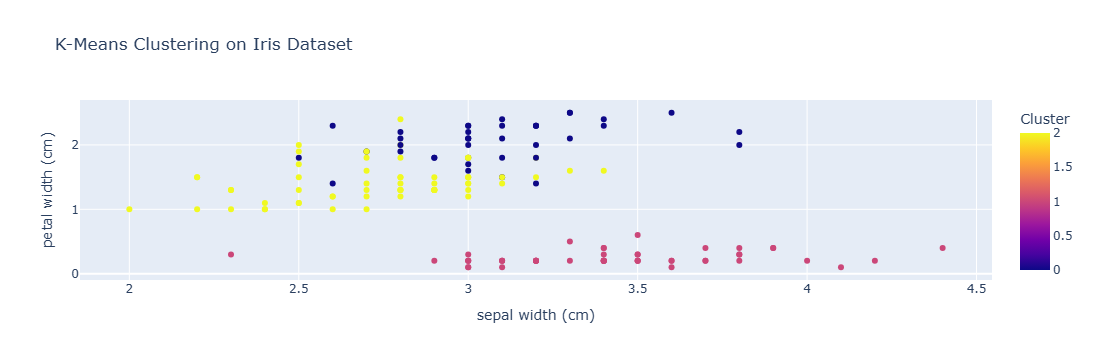

In [9]:
fig = px.scatter(
    df,
    x="sepal width (cm)",
    y="petal width (cm)",
    color="Cluster",
    title="K-Means Clustering on Iris Dataset"
)
fig.show()


<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:blue; padding-left:50px;margin:0;background-color:yellow;border-radius:15px;">
6. Interactive Dashboard
</p>


<p style="font-family:'Times New Roman'; font-size:25px; font-weight:bold; color:red; padding-left:100px;margin:0;background-color:yellow;border-radius:15px;">
Dashboard Controls
</p>


In [10]:
species_filter = widgets.Dropdown(
    options=["All"] + list(df["Species"].unique()),
    description="Species:"
)


In [11]:
def update_dashboard(species):
    if species != "All":
        filtered = df[df["Species"] == species]
    else:
        filtered = df

    kpi_fig = go.Figure()
    kpi_fig.add_trace(go.Indicator(
        mode="number",
        value=filtered.shape[0],
        title={"text": "Sample Count"}
    ))

    scatter_fig = px.scatter(
        filtered,
        x="sepal length (cm)",
        y="petal length (cm)",
        color="Species",
        title="Sepal vs Petal Length"
    )

    kpi_fig.show()
    scatter_fig.show()


In [12]:
widgets.interact(update_dashboard, species=species_filter);


interactive(children=(Dropdown(description='Species:', options=('All', 'setosa', 'versicolor', 'virginica'), v…